# **Feature importnaces**

**Feuture importances** — базовая важность, с которой чаще всего сталкиваются и знакомятся специалисты ML. В [уроке](https://stepik.org/lesson/1263838/step/1?unit=1277963) мы с вами познакомились с базовой важностью признаков, научились её вычислять вручную и рассмотрели, каких типов она бывает.

**Цель домашнего задания:** глубже разобраться с тем, с чем мы аппелируем из библиотек `sklearn`, `xgboost`, `catboost`.

<a href="https://ibb.co/K0Hw27y"><img src="https://i.ibb.co/NVzS9pY/fayiz-musthafa-2kh-K5-J2-HYt0-unsplash.jpg" alt="fayiz-musthafa-2kh-K5-J2-HYt0-unsplash" border="0"></a>

In [ ]:
!pip install catboost xgboost lightgbm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


rng = np.random.RandomState(seed=42)

path = 'https://github.com/SadSabrina/interpretable_AI_course/raw/refs/heads/main/data/diabetes.csv'

df = pd.read_csv(path)

: 

In [ ]:
def get_feature_imp_frame(model, indexes, model_name):

  """Функция для построения датафрейма с важностью признаков модели.

  model: обученная модель, имеющая атрибут feature_importances_
  indexes: названия признаков, на которых модель обучена
  model_name: str, название модели

  возвращает: pandas.DataFrame"""

  data = pd.DataFrame(model.feature_importances_, index=indexes).sort_values(by=0, ascending=False)
  data.columns = [model_name+'_feature_imp']

  return data

Продолжим работать с набором данных про диабет. Здесь вам не нужно проводить подробный EDA и, кроме того, мы максимально упростим шаги предобработки.

В модуле мы не затрагивали важность признаков в `GradientBoostingClassifier` и не случайно. Согласно исходному коду sklearn, она вычисляется [аналогично важности деревьев](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/tree/_tree.pyx). Важность берется для каждого дерева, после чего чего усредняется по количеству деревьев в ансамбле и нормализуется так, что сумма всех важностей становится равной единице.

![img](https://ltdfoto.ru/images/2024/05/16/SNIMOK-EKRANA-2024-05-16-V-16.37.47.png)

Для начала, обучим лес на сырых данных и, чтобы убедиться в sklearn — обучим также `GradientBoostingClassifier`.

In [ ]:
rf_base = RandomForestClassifier(random_state=42, criterion='gini')
gb_base = GradientBoostingClassifier(random_state=42)

models = [rf_base, gb_base]

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], random_state=42)

for model, name in zip(models, ['RandomForest', 'GradientBoosting']):

  model.fit(X_train, y_train)

 # получите прогнозы модели
  y_pred=

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(name)
  print(f"Accuracy: {accuracy:.2f}")
  print(f"F1: {f1:.2f}")

RandomForest
Accuracy: 0.73
F1: 0.64
GradientBoosting
Accuracy: 0.74
F1: 0.66


Заметим, что мы получили неплохие модели. Посмотрим на важность признаков внутри них.

In [ ]:
get_feature_imp_frame(rf_base, X_train.columns, 'Rf_base')

,Rf_base_feature_imp
Glucose,0.278761
BMI,0.158058
Age,0.139093
DiabetesPedigreeFunction,0.118225
BloodPressure,0.088883
Pregnancies,0.074491
SkinThickness,0.071575
Insulin,0.070913


In [ ]:
get_feature_imp_frame(gb_base, X_train.columns, 'Gb_base')

,Rf_base_feature_imp
Glucose,0.443724
BMI,0.167689
Age,0.144163
DiabetesPedigreeFunction,0.102260
Insulin,0.054718
Pregnancies,0.034850
BloodPressure,0.031435
SkinThickness,0.021162


**Задача 1.** Измените критерий обучения в модели `rf_base`. Как изменилась важность признаков внутри модели?

**ваш ответ здесь**

Хорошо. Мы базово посмотрели на важность. Теперь давайте немного поиграем с гиперпараметрами. Рассмотрим глубину (`max_depth`).

**Задача 2.** Возьмите модель `rf_base`. Зафиксируйте параметр `max_depth` и проитерируйтесь по оптимальному диапазону изменения (подумайте, почему мы называем оптимальным именно этот диапазон – не больше).

При depth  =x (равном чему?) наблюдается максимальный вес у первого параметра. В ответ укажите x.

In [ ]:
for i in range(1, 10, 1):
  rf_base = RandomForestClassifier(random_state=42, criterion='gini', max_depth=i)
  rf_base.fit(X_train, y_train)
  # Оценим модель
  y_pred = rf_base.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Ваш код здесь

**ваш ответ здесь**

*Всегда ли справедливо, что лучше всего верить важности признаков у лучшей по качеству модели? Нет. Оценивая только одну модель, мы получаем точечную оценку, а она может быть не совсем корректной.*

 *Лучше для задачи оценки важности использовать минимум 2-3 модели из разных семейств или рассматривать минимум такое-же количество разных моделей одного семейства.*

Добавим к набору данных два фиктивных признака — случайное разбиение на категориальные признаки и признак, представляющий собой случайное число.  

In [ ]:
#сгенерируем два случайных признака

df["random_num"] = rng.randn(df.shape[0])*7
df["random_cat"] = rng.randint(2, size=df.shape[0])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,random_num,random_cat
0,6,148,72,35,0,33.6,0.627,50,1,3.476999,0
1,1,85,66,29,0,26.6,0.351,31,0,-0.967850,1
2,8,183,64,0,0,23.3,0.672,32,1,4.533820,1
3,1,89,66,23,94,28.1,0.167,21,0,10.661209,0
4,0,137,40,35,168,43.1,2.288,33,1,-1.639074,0


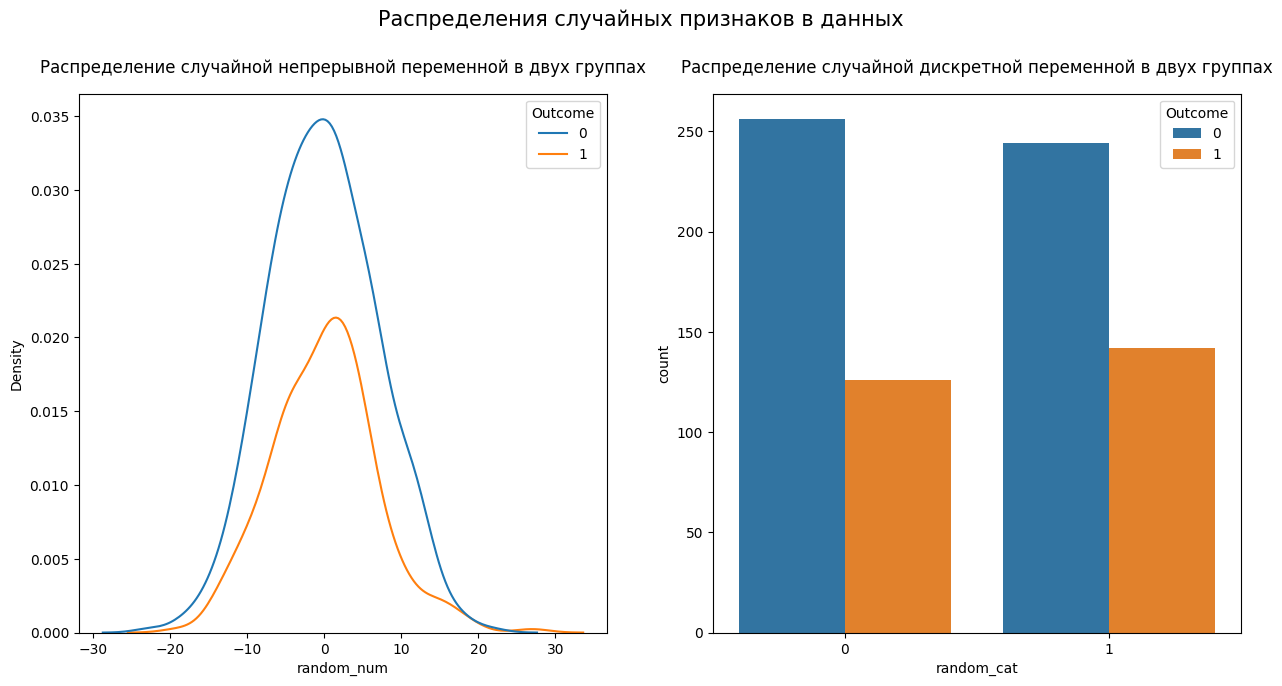

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.kdeplot(data=df, x='random_num', hue='Outcome', ax=ax[0])
ax[0].set_title('Распределение случайной непрерывной переменной в двух группах', pad=15);

sns.countplot(data=df, x='random_cat', hue='Outcome', ax=ax[1])
ax[1].set_title('Распределение случайной дискретной переменной в двух группах', pad=15);

plt.suptitle('Распределения случайных признаков в данных', y=1, fontsize=15);

In [ ]:
#Получим новые тренировочные данные

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], random_state=42, test_size=0.25)

Инициализируйте следующие модели:


1. RandomForestClassifier
2. GradientBoostingClassifier
3. CatBoostClassifier
4. XGBClassifier
5. LGBMClassifier

**У каждой зафиксируйте:** `random_state=42`

In [ ]:
# Инициалилизруем 5 моделей

rf =
gb =
cb =
xgb =
lgbm =

models.clear()
models = [rf, gb, cb, xgb, lgbm]

In [ ]:
#обучим и оценим

for (model, name) in zip(models, ['Rf', 'GB', 'Cb', 'XGB', 'LGBM']):
  model.fit(X_train, y_train);
  predictions = model.predict(X_test)

  print(name)
  print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")


Rf
Accuracy: 0.73
GB
Accuracy: 0.74
Cb
Accuracy: 0.74
XGB
Accuracy: 0.74
LGBM
Accuracy: 0.74


In [ ]:
get_feature_imp_frame(rf, rf.feature_names_in_, 'rf')

,rf_feature_imp
Glucose,0.258143
BMI,0.147060
Age,0.129007
DiabetesPedigreeFunction,0.095541
random_num,0.089570
BloodPressure,0.075195
Insulin,0.069026
Pregnancies,0.063935
SkinThickness,0.057785
random_cat,0.014738


Обратите внимание: что фиктивный признак попал в топ-5 важных.

**Задача 3**. Проверьте важности признаков у других моделей. Обошла ли какая-то из моделей фиктивные признаки?

In [ ]:
### ваш код здесь

Подумайте, почему в задаче получился такой результат. Выберите корректные ответы на степик.

Посмотрим, как важность признаков меняется от метода к методу на примере признаков в XGBoost. Соберите набор данных, где по строкам отложены названия признаков, а столбцы представляют различные коээфициенты важности при данных признаках.

Вам может потребоваться [документация](https://xgboost.readthedocs.io/en/stable/python/python_api.html).

In [ ]:
xgb_importances_data = pd.DataFrame(xgb.get_booster().get_score(importance_type='gain').items())
xgb_importances_data.columns = ['Feature name', 'Gain importances']

**Задача 4.** Собранные важности эквивалентны друг другу по величине и наиболее важным признакам?

**Ваш ответ здесь**

**Задача 5.** На наборе данных с фиктивными признаками обучите логистическую регресиию. Какой признак выбран самым важным данной моделью?

# Выводы:

И так, мы посмотрели на feature_importances в ансамблях и сравнили их с коэффициентами регрессии. Закрепите для себя текстовые пукнты и, по желанию, можете поделиться ими в чате курса.